In [28]:
import sys, os
import matplotlib
import cartopy
import xarray as xr

In [29]:
%matplotlib inline

In [30]:
from opendrift.models.oceandrift import OceanDrift
from opendrift.readers import reader_ROMS_native

import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime

np.random.seed(983214)

In [31]:
fjordos_geo = xr.open_dataset("https://thredds.met.no/thredds/dodsC/fjordos/geogrid_tmp/test_polstere_1h_0007.nc")
fjordos_geo

<xarray.Dataset>
Dimensions:     (ocean_time: 720, s_rho: 42, s_w: 43, eta_rho: 741,
                 xi_rho: 397, xi_u: 396, eta_v: 740)
Coordinates:
  * ocean_time  (ocean_time) datetime64[ns] 2014-06-30T13:00:00 ... 2014-07-3...
  * s_rho       (s_rho) float64 -0.9881 -0.9643 -0.9405 ... -0.03571 -0.0119
  * s_w         (s_w) float64 -1.0 -0.9762 -0.9524 ... -0.04762 -0.02381 0.0
Dimensions without coordinates: eta_rho, xi_rho, xi_u, eta_v
Data variables: (12/15)
    projection  int32 ...
    Cs_r        (s_rho) float64 ...
    Cs_w        (s_w) float64 ...
    h           (eta_rho, xi_rho) float32 ...
    mask_rho    (eta_rho, xi_rho) float32 ...
    angle       (eta_rho, xi_rho) float32 ...
    ...          ...
    salt        (ocean_time, s_rho, eta_rho, xi_rho) float32 ...
    temp        (ocean_time, s_rho, eta_rho, xi_rho) float32 ...
    u           (ocean_time, s_rho, eta_rho, xi_u) float32 ...
    v           (ocean_time, s_rho, eta_v, xi_rho) float32 ...
    lat_rho     (eta_rho, xi_rho) float32 ...
    lon_rho     (eta_rho, xi_rho) float32 ...
Attributes:
    DODS_EXTRA.Unlimited_Dimension:  ocean_time

In [32]:
fjordos = xr.open_dataset("/lustre/storeB/project/fou/hi/FjordOs/fjordos2_hindcast/v6/exp1/ocean_his_0007.nc4")
fjordos

<xarray.Dataset>
Dimensions:         (ocean_time: 720, s_w: 43, eta_rho: 899, xi_rho: 299,
                     tracer: 2, s_rho: 42, boundary: 4, eta_psi: 898,
                     xi_psi: 298, eta_u: 899, xi_u: 298, eta_v: 898, xi_v: 299)
Coordinates:
    lat_psi         (eta_psi, xi_psi) float64 ...
    lat_rho         (eta_rho, xi_rho) float64 ...
    lat_u           (eta_u, xi_u) float64 ...
    lat_v           (eta_v, xi_v) float64 ...
    lon_psi         (eta_psi, xi_psi) float64 ...
    lon_rho         (eta_rho, xi_rho) float64 ...
    lon_u           (eta_u, xi_u) float64 ...
    lon_v           (eta_v, xi_v) float64 ...
  * ocean_time      (ocean_time) datetime64[ns] 2014-06-30T13:00:00 ... 2014-...
  * s_rho           (s_rho) float64 -0.9881 -0.9643 -0.9405 ... -0.03571 -0.0119
  * s_w             (s_w) float64 -1.0 -0.9762 -0.9524 ... -0.04762 -0.02381 0.0
Dimensions without coordinates: eta_rho, xi_rho, tracer, boundary, eta_psi,
                                xi_psi, eta_u, xi_u, eta_v, xi_v
Data variables: (12/99)
    AKt             (ocean_time, s_w, eta_rho, xi_rho) float32 ...
    AKv             (ocean_time, s_w, eta_rho, xi_rho) float32 ...
    Akk_bak         float64 ...
    Akp_bak         float64 ...
    Akt_bak         (tracer) float64 ...
    Akv_bak         float64 ...
    ...              ...
    v               (ocean_time, s_rho, eta_v, xi_v) float32 ...
    v_northward     (ocean_time, s_rho, eta_rho, xi_rho) float32 ...
    vbar            (ocean_time, eta_v, xi_v) float32 ...
    w               (ocean_time, s_w, eta_rho, xi_rho) float32 ...
    xl              float64 ...
    zeta            (ocean_time, eta_rho, xi_rho) float32 ...
Attributes: (12/33)
    file:              /lustre/storeB/users/nilsmk/metroms_run/fjordos_hindca...
    format:            netCDF-3 64bit offset file
    Conventions:       CF-1.4, SGRID-0.3
    type:              ROMS/TOMS history file
    title:             ROMS
    var_info:          /home/nilsmk/metroms_apps/fjordos_hindcast/include/var...
    ...                ...
    compiler_flags:    -xHost  -free -free
    tiling:            004x036
    history:           Wed Jan 22 16:28:40 2020: ncks -O --4 -L 3 ocean_his_0...
    ana_file:          ROMS/Functionals/ana_btflux.h, ROMS/Functionals/ana_sr...
    CPP_options:       FJORDOS, ADD_FSOBC, ADD_M2OBC, ALBEDO, ANA_BSFLUX, ANA...
    NCO:               netCDF Operators version 4.8.0 (Homepage = http://nco....

In [45]:
o = OceanDrift(loglevel=50)

print(o)

Model:	OceanDrift     (OpenDrift version 1.10.5)
	0 active Lagrangian3DArray particles  (0 deactivated, 0 scheduled)
-------------------
Environment variables:
  -----
Readers not added for the following variables:
  land_binary_mask
  ocean_mixed_layer_thickness
  ocean_vertical_diffusivity
  sea_floor_depth_below_sea_level
  sea_surface_wave_mean_period_from_variance_spectral_density_second_frequency_moment
  sea_surface_wave_period_at_variance_spectral_density_maximum
  sea_surface_wave_significant_height
  sea_surface_wave_stokes_drift_x_velocity
  sea_surface_wave_stokes_drift_y_velocity
  surface_downward_x_stress
  surface_downward_y_stress
  turbulent_generic_length_scale
  turbulent_kinetic_energy
  upward_sea_water_velocity
  x_sea_water_velocity
  x_wind
  y_sea_water_velocity
  y_wind



In [46]:
#norkyst_model_input_files = [
#                "https://thredds.met.no/thredds/dodsC/fou-hi/norkyst800m-1h/NorKyst-800m_ZDEPTHS_his.an.2019072100.nc"
#            ]

fjordos_model_input_files = [
                "/lustre/storeB/project/fou/hi/FjordOs/fjordos2_hindcast/v6/exp1/ocean_his_0007.nc4"
            ]
#                "https://thredds.met.no/thredds/dodsC/fjordos/fjordos2_hindcast/v6/exp1/ocean_his_0007.nc4"
#            ]

reader = reader_ROMS_native.Reader(fjordos_model_input_files)
print(reader)

Reader: roms native
Projection: 
  None
Coverage: [pixels]
  xmin: 0.000000   xmax: 298.000000   step: 1   numx: 299
  ymin: 0.000000   ymax: 898.000000   step: 1   numy: 899
  Corners (lon, lat):
    ( 10.49,  59.91)  ( 10.82,  59.93)
    ( 10.00,  58.97)  ( 11.20,  58.97)
Vertical levels [sigma]: 
  [-0.98809524 -0.96428571 -0.94047619 -0.91666667 -0.89285714 -0.86904762
 -0.8452381  -0.82142857 -0.79761905 -0.77380952 -0.75       -0.72619048
 -0.70238095 -0.67857143 -0.6547619  -0.63095238 -0.60714286 -0.58333333
 -0.55952381 -0.53571429 -0.51190476 -0.48809524 -0.46428571 -0.44047619
 -0.41666667 -0.39285714 -0.36904762 -0.3452381  -0.32142857 -0.29761905
 -0.27380952 -0.25       -0.22619048 -0.20238095 -0.17857143 -0.1547619
 -0.13095238 -0.10714286 -0.08333333 -0.05952381 -0.03571429 -0.01190476]
Available time range:
  start: 2014-06-30 13:00:00   end: 2014-07-30 12:00:00   step: 1:00:00
    720 times (0 missing)
Variables:
  x_wind
  y_wind
  sea_floor_depth_below_sea_level
  l

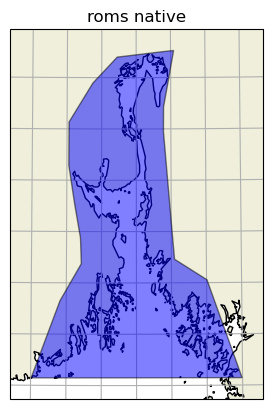

In [47]:
reader.plot()

In [48]:
o.add_reader([reader])

In [49]:
print("First available timestep in reader: {}".format(reader.start_time))
print("Last available timestep in reader: {}".format(reader.end_time))

sim_start_time_index = 5*24
sim_end_time_index = 5*24 + 6

sim_start_time = reader.times[sim_start_time_index]
sim_end_time = reader.times[sim_end_time_index]

print("First timestep of simulation: {}".format(sim_start_time))
print("Last timestep of simulation: {}".format(sim_end_time))

First available timestep in reader: 2014-06-30 13:00:00
Last available timestep in reader: 2014-07-30 12:00:00
First timestep of simulation: 2014-07-05 13:00:00
Last timestep of simulation: 2014-07-05 19:00:00


In [73]:
# random seeding in the middle of the inner Oslofjord
#o.seed_elements(lon=10.55, lat=59.80, number=10, radius=500,
#                    time=sim_start_time)


seed_points_lats = [59.78610610961914,
                  59.700775146484375,
                  59.74568176269531,
                  59.8759651184082,
                  59.822044372558594,
                  59.81306076049805]

seed_points_lons = [10.55042552947998,
                  10.58590030670166,
                  10.53268814086914,
                  10.656847953796387,
                  10.710057258605957,
                  10.5149507522583]

n_seeds = len(seed_points_lats)

o.seed_elements(lat=seed_points_lats, lon=seed_points_lons, 
                time=sim_start_time, 
                wind_drift_factor=np.zeros_like(seed_points_lats))

In [51]:
print(o)

Model:	OceanDrift     (OpenDrift version 1.10.5)
	0 active Lagrangian3DArray particles  (0 deactivated, 6 scheduled)
-------------------
Environment variables:
  -----
  land_binary_mask
  sea_floor_depth_below_sea_level
  turbulent_kinetic_energy
  upward_sea_water_velocity
  x_sea_water_velocity
  x_wind
  y_sea_water_velocity
  y_wind
     1) roms native
  -----
Readers not added for the following variables:
  ocean_mixed_layer_thickness
  ocean_vertical_diffusivity
  sea_surface_wave_mean_period_from_variance_spectral_density_second_frequency_moment
  sea_surface_wave_period_at_variance_spectral_density_maximum
  sea_surface_wave_significant_height
  sea_surface_wave_stokes_drift_x_velocity
  sea_surface_wave_stokes_drift_y_velocity
  surface_downward_x_stress
  surface_downward_y_stress
  turbulent_generic_length_scale



In [52]:
print(o.list_configspec())

general:use_auto_landmask           [True] bool   A built-in GSHHG glo...
general:coastline_action            [stranding] enum  ['none', 'stranding', 'previous'] None means that obje...
general:time_step_minutes           [60] float min: 0.01, max: 1440 [minutes] Calculation time ste...
general:time_step_output_minutes    [None] float min: 1, max: 1440 [minutes] Output time step, i....
seed:ocean_only                     [True] bool   If True, elements se...
seed:number                         [1] int   min: 1, max: 100000000 [1] The number of elemen...
drift:max_age_seconds               [None] float min: 0, max: inf [seconds] Elements will be dea...
drift:advection_scheme              [euler] enum  ['euler', 'runge-kutta', 'runge-kutta4'] Numerical advection ...
drift:current_uncertainty           [0] float min: 0, max: 5 [m/s] Add gaussian perturb...
drift:current_uncertainty_uniform   [0] float min: 0, max: 5 [m/s] Add gaussian perturb...
drift:horizontal_diffusivity        [0] flo

In [53]:
#o.run(end_time=sim_end_time, time_step=60, time_step_output=60, outfile='opendrift.nc') # sim & dump every minute
o.run(end_time=sim_end_time, time_step=600, time_step_output=600, outfile='opendrift.nc') # sim & dump every 10 minutes

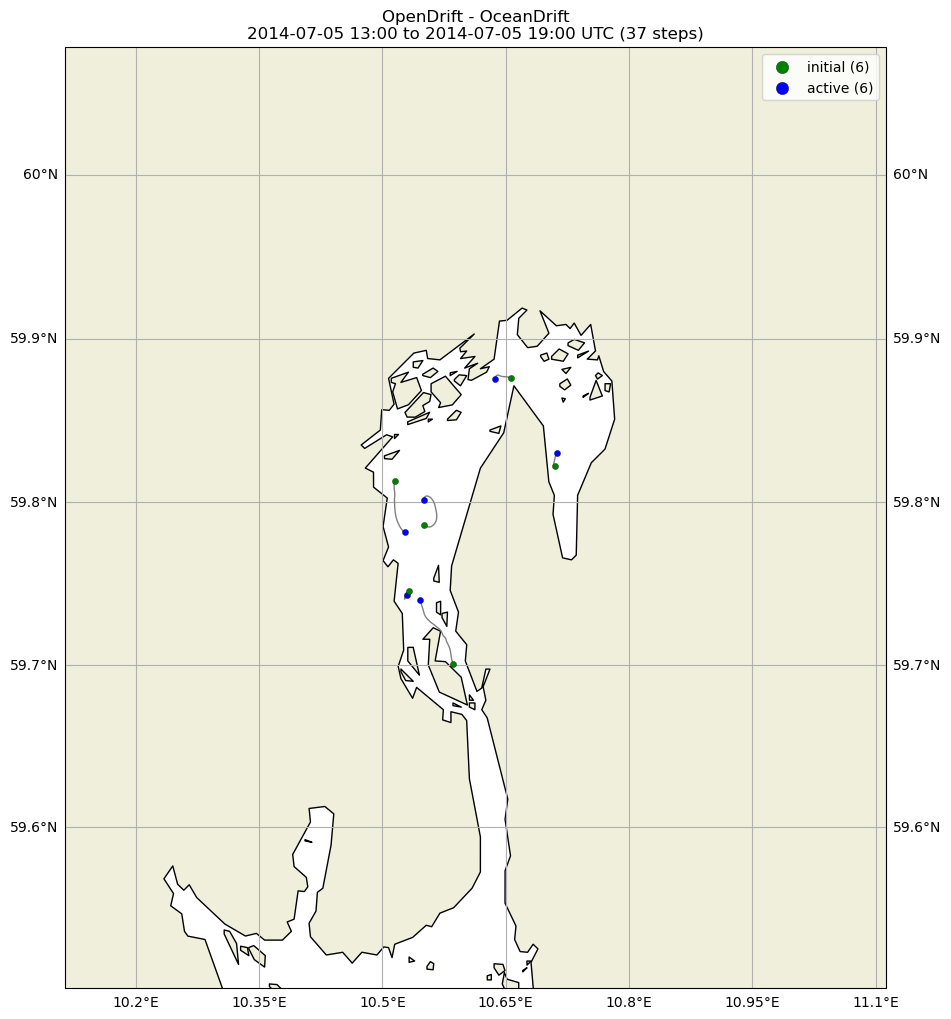

(<GeoAxes: title={'center': 'OpenDrift - OceanDrift\n2014-07-05 13:00 to 2014-07-05 19:00 UTC (37 steps)'}>,
 <Figure size 957.579x1100 with 1 Axes>)

In [54]:
o.plot()

In [55]:
print(o)

--------------------
Reader performance:
--------------------
roms native
 0:00:09.0  total
 0:00:00.0  preparing
 0:00:08.7  reading
 0:00:00.0  interpolation
 0:00:00.0  interpolation_time
 0:00:00.0  masking
 0:00:00.2  rotating vectors
--------------------
global_landmask
 0:00:00.0  total
 0:00:00.0  preparing
 0:00:00.0  reading
 0:00:00.0  masking
--------------------
Performance:
   16.9 total time
    7.4 configuration
    0.0 preparing main loop
      0.0 making dynamical landmask
      0.0 moving elements to ocean
      9.2 readers
        0.0 global_landmask
        0.1 postprocessing
    9.4 main loop
        9.1 roms native
      0.0 updating elements
    0.1 cleaning up
--------------------
Model:	OceanDrift     (OpenDrift version 1.10.5)
	6 active Lagrangian3DArray particles  (0 deactivated, 0 scheduled)
-------------------
Environment variables:
  -----
  sea_floor_depth_below_sea_level
  turbulent_kinetic_energy
  upward_sea_water_velocity
  x_sea_water_velocity
  x_w

In [87]:
print(len(o.get_lonlats()))
print(o.get_lonlats()[0].shape) # (n_drifters, n_timesteps)

print(o.get_lonlats()[0][0]) # lons for drifter 0
print(o.get_lonlats()[1][0]) # lats for drifter 0

print(o.get_time_array()[0]) # list of times (datetime)

print(reader.lonlat2xy(o.get_lonlats()[0][0], o.get_lonlats()[1][0]))

2
(6, 37)
[10.55042552947998 10.551961898803711 10.553532600402832 10.55512809753418
 10.556699752807617 10.558184623718262 10.559581756591797
 10.560917854309082 10.562214851379395 10.563485145568848
 10.564537048339844 10.56534194946289 10.565823554992676
 10.566076278686523 10.566004753112793 10.565690994262695
 10.565179824829102 10.564562797546387 10.56391716003418
 10.563333511352539 10.562496185302734 10.561405181884766
 10.560178756713867 10.558891296386719 10.557600975036621
 10.556337356567383 10.55512523651123 10.554023742675781
 10.553053855895996 10.552223205566406 10.551556587219238
 10.551082611083984 10.550716400146484 10.550446510314941
 10.550260543823242 10.550148963928223 10.550094604492188]
[59.78610610961914 59.78550338745117 59.78507995605469 59.78482437133789
 59.78473663330078 59.784820556640625 59.78508758544922 59.785526275634766
 59.786109924316406 59.78682327270508 59.78766632080078 59.78862762451172
 59.789730072021484 59.79096221923828 59.79228973388672 5

In [91]:
time = o.get_time_array()[0]

lon = o.get_lonlats()[0]
lat = o.get_lonlats()[1]

x = []
y = []
for i in range(n_seeds):
    x_i, y_i = reader.lonlat2xy(o.get_lonlats()[0][i], o.get_lonlats()[1][i])
    x.append(x_i.tolist())
    y.append(y_i.tolist())

opendrift_results = {"time": o.get_time_array()[0],
                    "lon": lon,
                    "lat": lat,
                    "x": x,
                    "y": y}

print(opendrift_results)

{'time': [datetime.datetime(2014, 7, 5, 13, 0), datetime.datetime(2014, 7, 5, 13, 10), datetime.datetime(2014, 7, 5, 13, 20), datetime.datetime(2014, 7, 5, 13, 30), datetime.datetime(2014, 7, 5, 13, 40), datetime.datetime(2014, 7, 5, 13, 50), datetime.datetime(2014, 7, 5, 14, 0), datetime.datetime(2014, 7, 5, 14, 10), datetime.datetime(2014, 7, 5, 14, 20), datetime.datetime(2014, 7, 5, 14, 30), datetime.datetime(2014, 7, 5, 14, 40), datetime.datetime(2014, 7, 5, 14, 50), datetime.datetime(2014, 7, 5, 15, 0), datetime.datetime(2014, 7, 5, 15, 10), datetime.datetime(2014, 7, 5, 15, 20), datetime.datetime(2014, 7, 5, 15, 30), datetime.datetime(2014, 7, 5, 15, 40), datetime.datetime(2014, 7, 5, 15, 50), datetime.datetime(2014, 7, 5, 16, 0), datetime.datetime(2014, 7, 5, 16, 10), datetime.datetime(2014, 7, 5, 16, 20), datetime.datetime(2014, 7, 5, 16, 30), datetime.datetime(2014, 7, 5, 16, 40), datetime.datetime(2014, 7, 5, 16, 50), datetime.datetime(2014, 7, 5, 17, 0), datetime.datetime(20

In [92]:
import pickle

with open("fjordos_opendrift_trajectories.pickle", "wb") as f:
    pickle.dump(opendrift_results, f, protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
with open("fjordos_opendrift_trajectories.pickle", "rb") as f:
    opendrift_results = pickle.load(f)